In [1]:
# Task 3: Hypothesis Testing - ACIS Car Insurance Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind

# Set up visualization style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('../data/MachineLearningRating_v3.csv', delimiter='|')

# Drop rows with missing values in key columns
df = df.dropna(subset=['TotalPremium', 'TotalClaims', 'Province', 'PostalCode', 'Gender'])

# Derived metrics
df['Margin'] = df['TotalPremium'] - df['TotalClaims']
df['HasClaim'] = df['TotalClaims'] > 0
df['ClaimFrequency'] = df['HasClaim'].astype(int)
df['ClaimSeverity'] = df['TotalClaims'].where(df['HasClaim'])

C:\Users\Dawa Cloud\AppData\Local\Temp\ipykernel_13080\1338984576.py:13: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.csv', delimiter='|')


H1 - Claim Frequency across Provinces: F= 13.516239878578666 , p= 9.245710131121655e-20
H1 - Claim Severity across Provinces: F= 4.860395020546359 , p= 5.697438983975486e-06


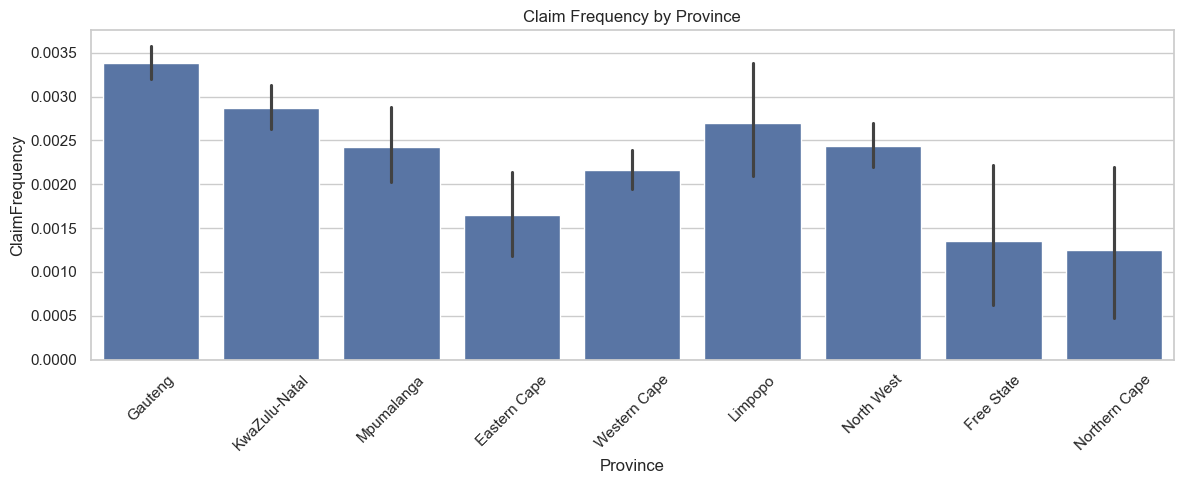

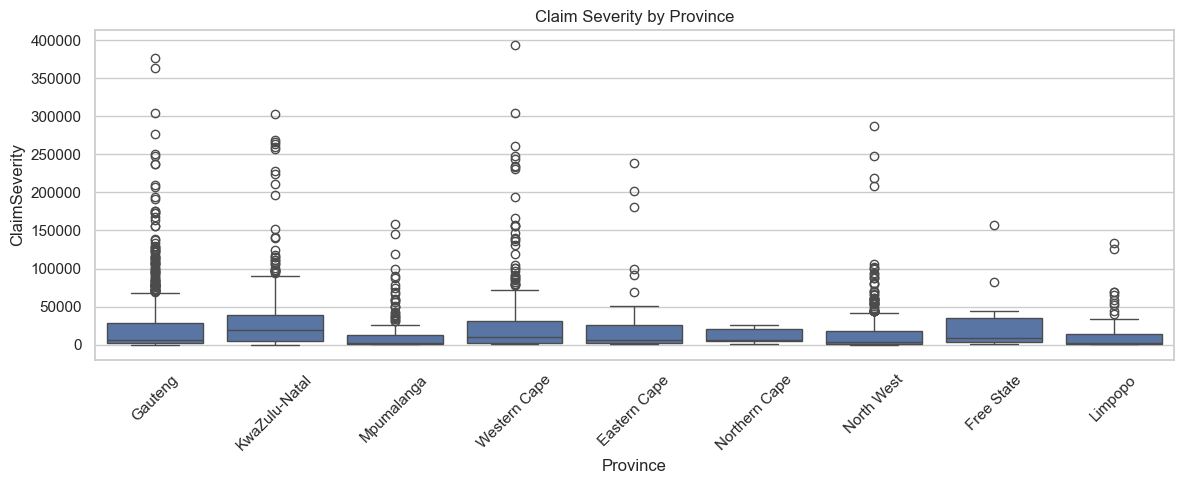

In [2]:
# Hypothesis 1: Risk differences across Provinces
# -----------------------------
province_groups_freq = [group['ClaimFrequency'] for _, group in df.groupby('Province')]
f_stat_freq_prov, p_val_freq_prov = f_oneway(*province_groups_freq)

province_groups_sev = [group['ClaimSeverity'].dropna() for _, group in df[df['HasClaim']].groupby('Province')]
f_stat_sev_prov, p_val_sev_prov = f_oneway(*province_groups_sev)

print("H1 - Claim Frequency across Provinces: F=", f_stat_freq_prov, ", p=", p_val_freq_prov)
print("H1 - Claim Severity across Provinces: F=", f_stat_sev_prov, ", p=", p_val_sev_prov)

# Visualization
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='Province', y='ClaimFrequency', estimator=np.mean)
plt.title("Claim Frequency by Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df['HasClaim']], x='Province', y='ClaimSeverity')
plt.title("Claim Severity by Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

H2 - Claim Frequency across ZipCodes: F= 6.741504985214528 , p= 5.634751144699815e-14


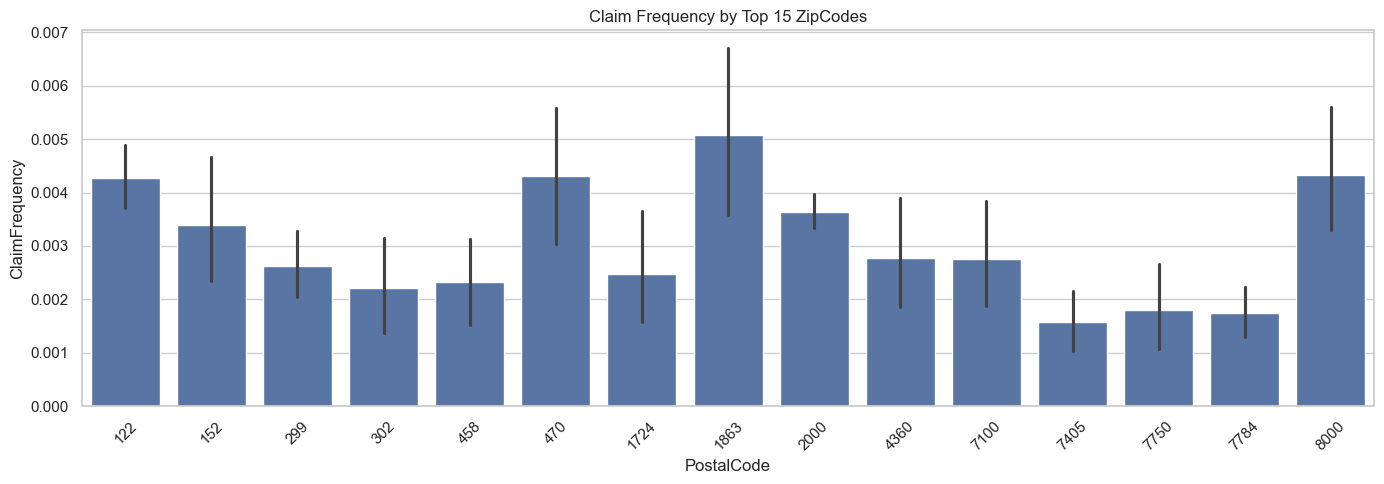

In [3]:
# Hypothesis 2: Risk differences between ZipCodes (top 15)
# -----------------------------
top_zipcodes = df['PostalCode'].value_counts().nlargest(15).index
df_zip = df[df['PostalCode'].isin(top_zipcodes)]

zip_groups_freq = [group['ClaimFrequency'] for _, group in df_zip.groupby('PostalCode')]
f_stat_zip_freq, p_val_zip_freq = f_oneway(*zip_groups_freq)

print("H2 - Claim Frequency across ZipCodes: F=", f_stat_zip_freq, ", p=", p_val_zip_freq)

# Visualization
plt.figure(figsize=(14, 5))
sns.barplot(data=df_zip, x='PostalCode', y='ClaimFrequency', estimator=np.mean)
plt.title("Claim Frequency by Top 15 ZipCodes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

H3 - Margin across ZipCodes: F= 2.2819898545606034 , p= 0.004076155346820106


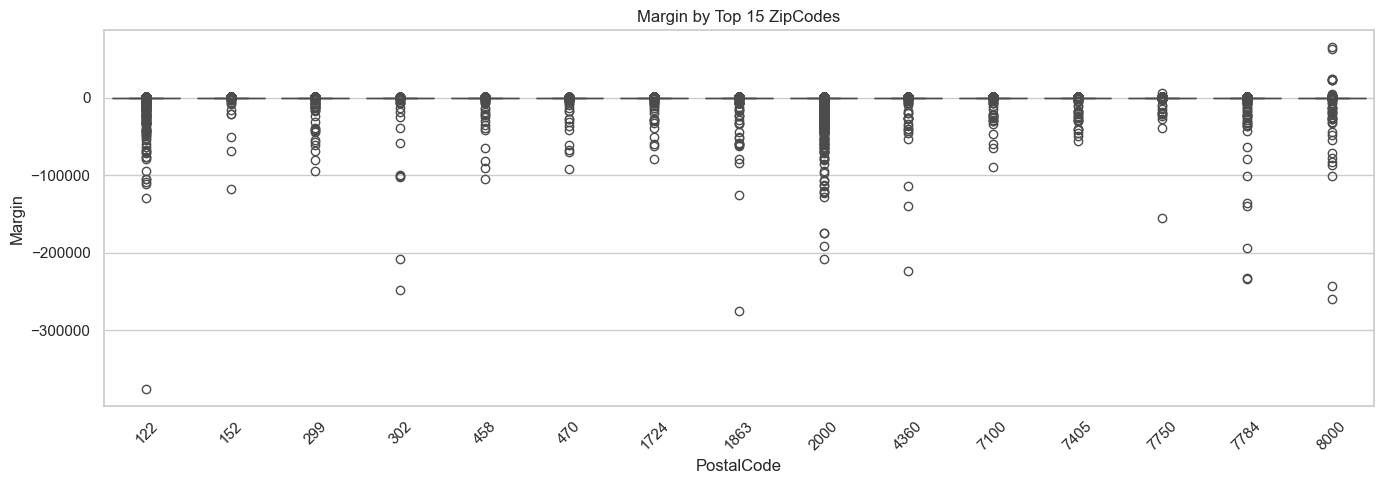

In [4]:
# Hypothesis 3: Margin differences between ZipCodes (top 15)
# -----------------------------
zip_groups_margin = [group['Margin'] for _, group in df_zip.groupby('PostalCode')]
f_stat_margin_zip, p_val_margin_zip = f_oneway(*zip_groups_margin)

print("H3 - Margin across ZipCodes: F=", f_stat_margin_zip, ", p=", p_val_margin_zip)

# Visualization
plt.figure(figsize=(14, 5))
sns.boxplot(data=df_zip, x='PostalCode', y='Margin')
plt.title("Margin by Top 15 ZipCodes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

H4 - Claim Frequency by Gender: T= 0.20549840547502804 , p= 0.8371873107059133


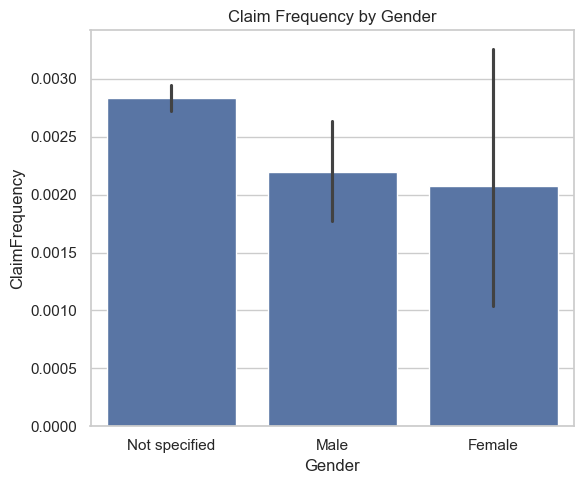

In [5]:
# Hypothesis 4: Gender-based risk difference
# -----------------------------
males = df[df['Gender'] == 'Male']['ClaimFrequency']
females = df[df['Gender'] == 'Female']['ClaimFrequency']

t_stat_gender, p_val_gender = ttest_ind(males, females, equal_var=False)

print("H4 - Claim Frequency by Gender: T=", t_stat_gender, ", p=", p_val_gender)

# Visualization
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='Gender', y='ClaimFrequency', estimator=np.mean)
plt.title("Claim Frequency by Gender")
plt.tight_layout()
plt.show()

In [6]:
# Summary Output
# -----------------------------
summary = {
    "H1 (Province - Claim Frequency)": p_val_freq_prov,
    "H1 (Province - Claim Severity)": p_val_sev_prov,
    "H2 (Zip - Claim Frequency)": p_val_zip_freq,
    "H3 (Zip - Margin)": p_val_margin_zip,
    "H4 (Gender - Claim Frequency)": p_val_gender,
}

print("\n--- Hypothesis Testing Summary (p-values) ---")
for k, v in summary.items():
    print(f"{k}: p-value = {v:.4f}")

# Optionally: Save to CSV
pd.DataFrame.from_dict(summary, orient='index', columns=['p-value']).to_csv('hypothesis_test_results.csv')


--- Hypothesis Testing Summary (p-values) ---
H1 (Province - Claim Frequency): p-value = 0.0000
H1 (Province - Claim Severity): p-value = 0.0000
H2 (Zip - Claim Frequency): p-value = 0.0000
H3 (Zip - Margin): p-value = 0.0041
H4 (Gender - Claim Frequency): p-value = 0.8372
